In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
ber  = np.array([0, 214, 279, 610, 596, 237])
dre  = np.array([214, 0, 492, 533, 496, 444])
ham  = np.array([279, 492, 0, 520, 772, 140])
kob  = np.array([610, 533, 520, 0, 521, 687])
mue  = np.array([596, 496, 772, 521, 0, 771])
ros  = np.array([237, 444, 140, 687, 771, 0])

dist = np.column_stack([ber, dre, ham, kob, mue, ros])

In [ ]:
# a, b, h, i are matrices
a = (dist ** 2) * (-0.5)
i = np.eye(6)
u = np.ones((6, 1))
h = i - (1/6) * (u @ u.T)
b = h @ a @ h                                               # Determine the inner product matrix

e_values, e_vectors = np.linalg.eigh(b)

eigvals, eigvecs = np.linalg.eig(b)
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]
sqrt_eigvals = np.sqrt(np.maximum(eigvals[:2], 0))
x = eigvecs[:, :2] @ np.diag(sqrt_eigvals)                  # Determine the coordinate matrix


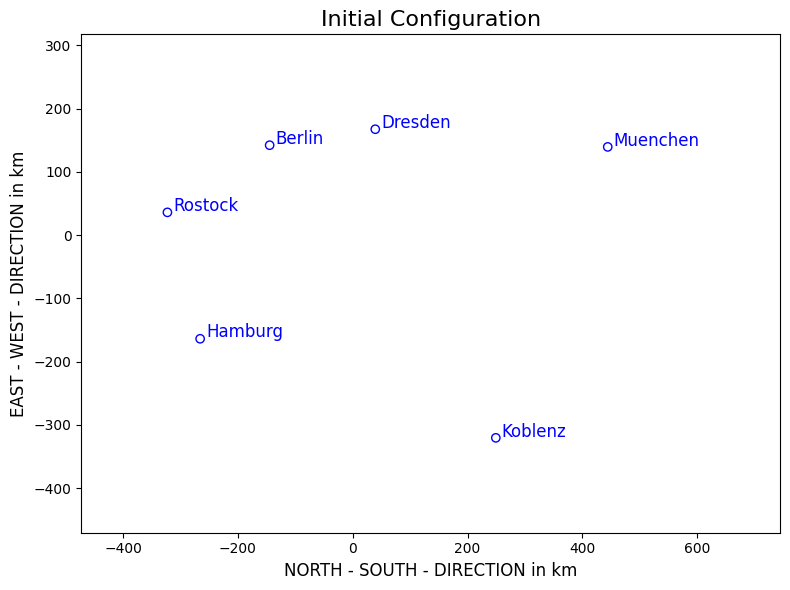

In [37]:
# Plot: Initial Configuration
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], color="blue", marker='o', facecolors='none')

center_x = (x[:, 0].min() + x[:, 0].max()) / 2
center_y = (x[:, 1].min() + x[:, 1].max()) / 2
rx = np.abs(x[:, 0] - center_x).max() + 150
ry = np.abs(x[:, 1] - center_y).max() + 150

plt.xlim(center_x - rx, center_x + rx + 150)
plt.ylim(center_y - ry, center_y + ry)


plt.xlabel("NORTH - SOUTH - DIRECTION in km", fontsize=12)
plt.ylabel("EAST - WEST - DIRECTION in km", fontsize=12)
plt.title("Initial Configuration", fontsize=16)
city_names = ["Berlin", "Dresden", "Hamburg", "Koblenz", "Muenchen", "Rostock"]
for i, name in enumerate(city_names):
    plt.text(x[i, 0]+10, x[i, 1]+10, name, color="blue", fontsize=12, ha='left', va='center')
plt.tight_layout()
plt.savefig("MVAMDScity1.png", dpi=144, transparent=True)
plt.show()